In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
# Load the dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c


Missing values in the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


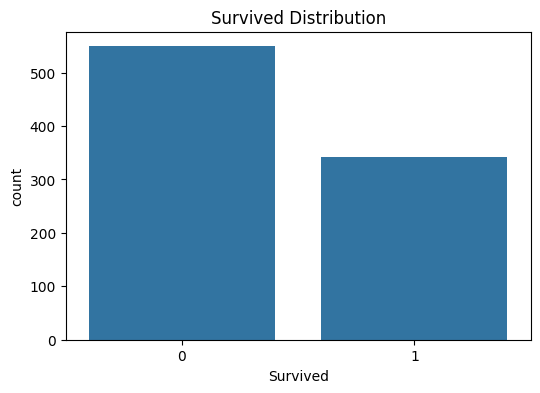

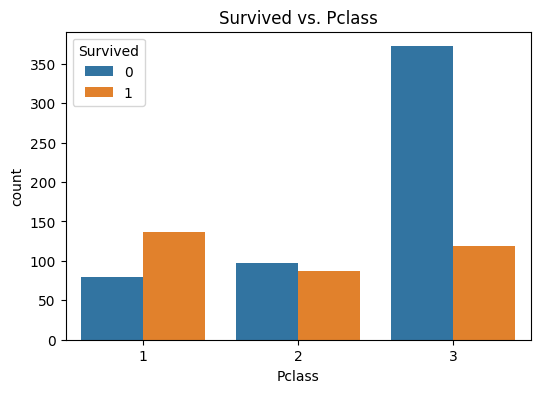

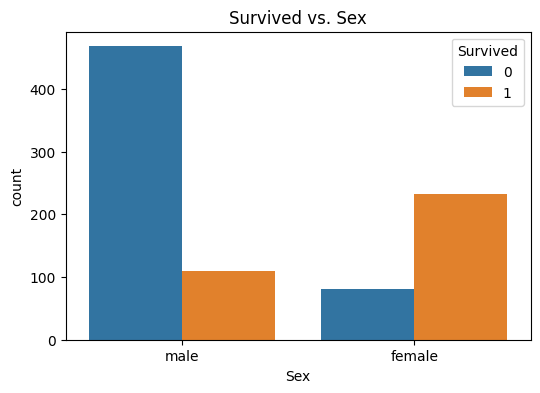

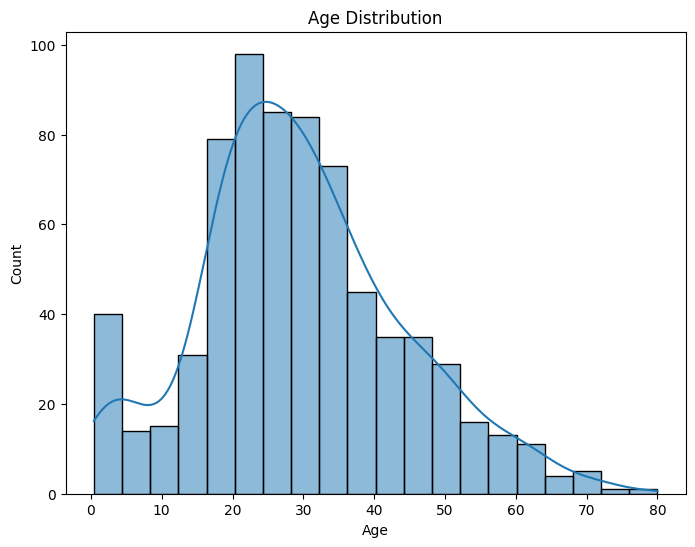

In [9]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Visualize the distribution of 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title('Survived Distribution')
plt.show()

# Visualize the relationship between 'Pclass' and 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survived vs. Pclass')
plt.show()

# Visualize the relationship between 'Sex' and 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survived vs. Sex')
plt.show()

# Visualize the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()



In [10]:
# Fill missing 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common port
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
data.drop('Cabin', axis=1, inplace=True)

# Drop 'Ticket' and 'Name' columns as they are not useful for the model
data.drop(['Ticket', 'Name'], axis=1, inplace=True)

# Convert 'Sex' to numeric
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

# Convert 'Embarked' to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Display the first few rows of the cleaned dataset
print("First 5 rows of the cleaned dataset:")
print(data.head())


First 5 rows of the cleaned dataset:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [11]:
# Select features and target
features = data.drop('Survived', axis=1)
target = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Initialize the model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.84


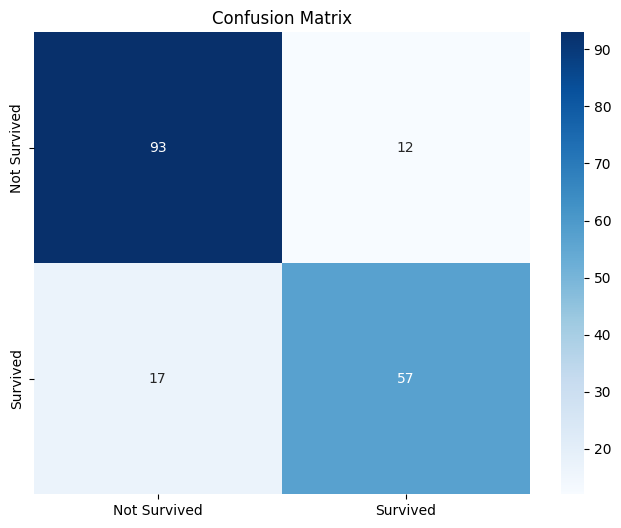

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
